<a href="https://colab.research.google.com/github/gokuldasvijay/Customer-Segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df=pd.read_csv(r"/content/drive/MyDrive/DATASETS/Mall_Customers.csv")

In [146]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [147]:
df.duplicated().sum()

0

In [148]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

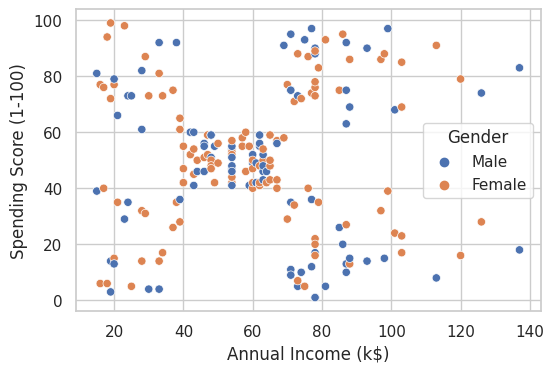

In [149]:
sns.set(style='whitegrid')
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df, hue="Gender")

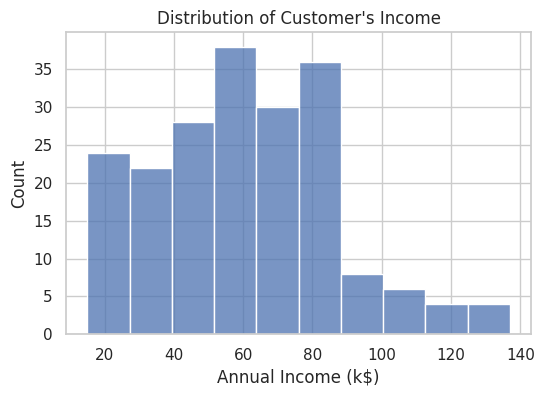

In [150]:
sns.histplot(data=df, x="Annual Income (k$)")
plt.title("Distribution of Customer's Income");

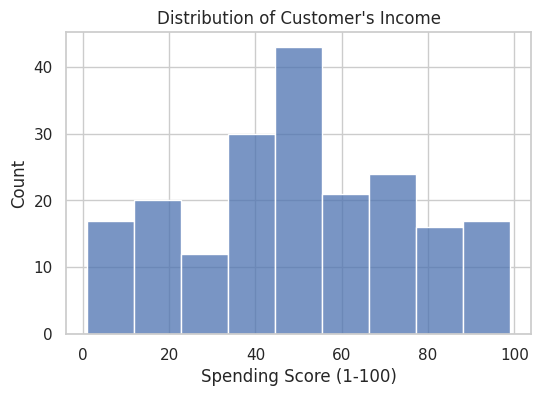

In [151]:
sns.histplot(data=df, x="Spending Score (1-100)")
plt.title("Distribution of Customer's Income");

<AxesSubplot:xlabel='Age', ylabel='Count'>

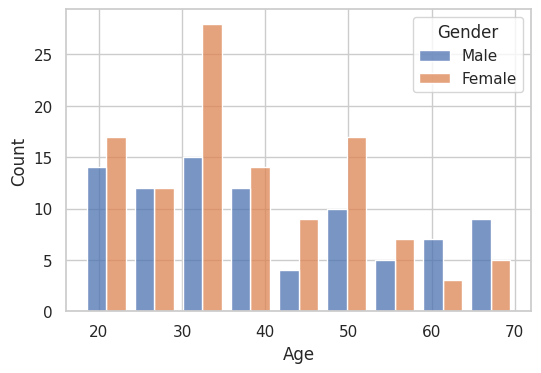

In [152]:
sns.histplot(data=df, x="Age", hue="Gender", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Gender', ylabel='count'>

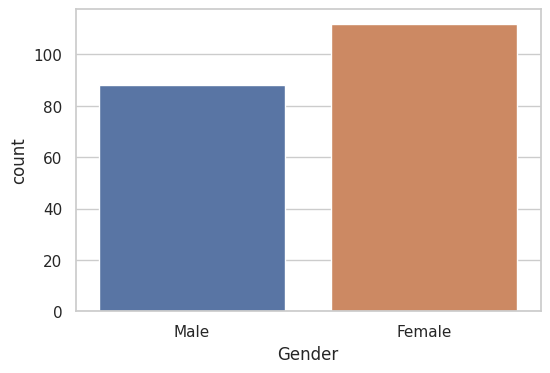

In [153]:
sns.countplot(x='Gender',data=df)

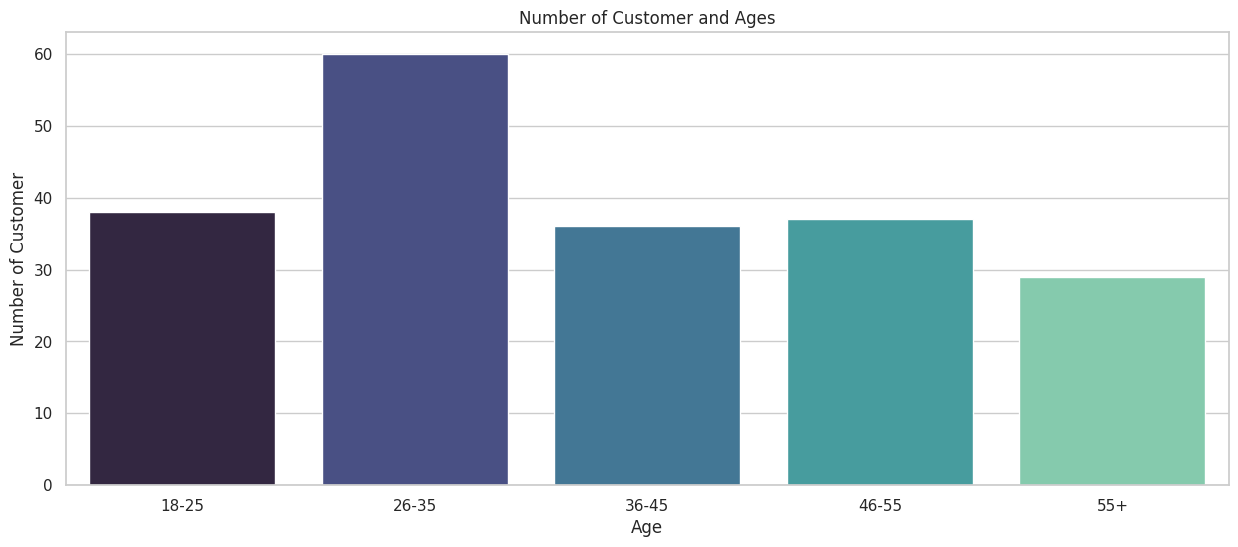

In [154]:
# Bar graph plotted to find the number of customers 
age_18_25= df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35= df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45=df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55=df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above=df.Age [df.Age >= 56]
agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot (x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

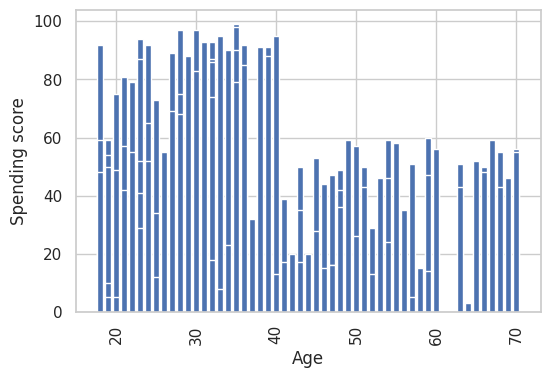

In [155]:
import matplotlib.pyplot as plt

plt.bar( df["Age"], df["Spending Score (1-100)"])
plt.xticks(rotation=90)
plt.ylabel('Spending score')
plt.xlabel('Age')
plt.show()


In [156]:
!pip install sweetviz
import sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
report=sweetviz.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


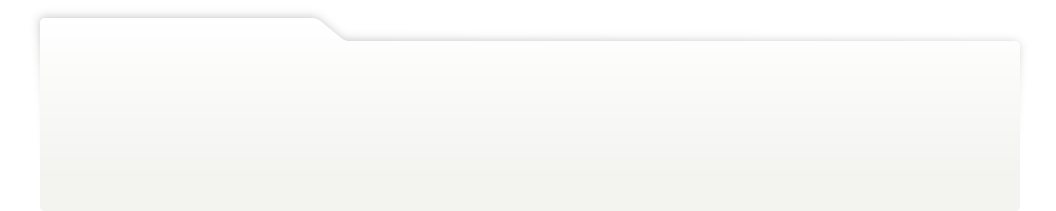
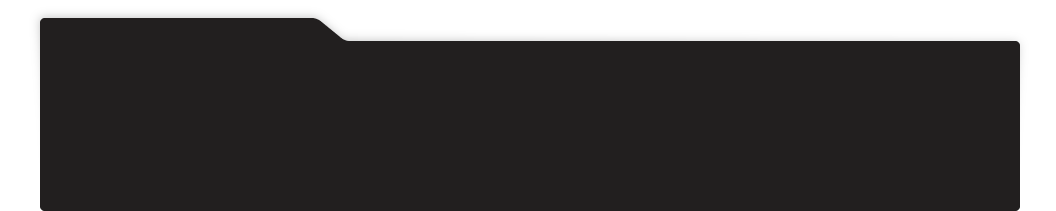
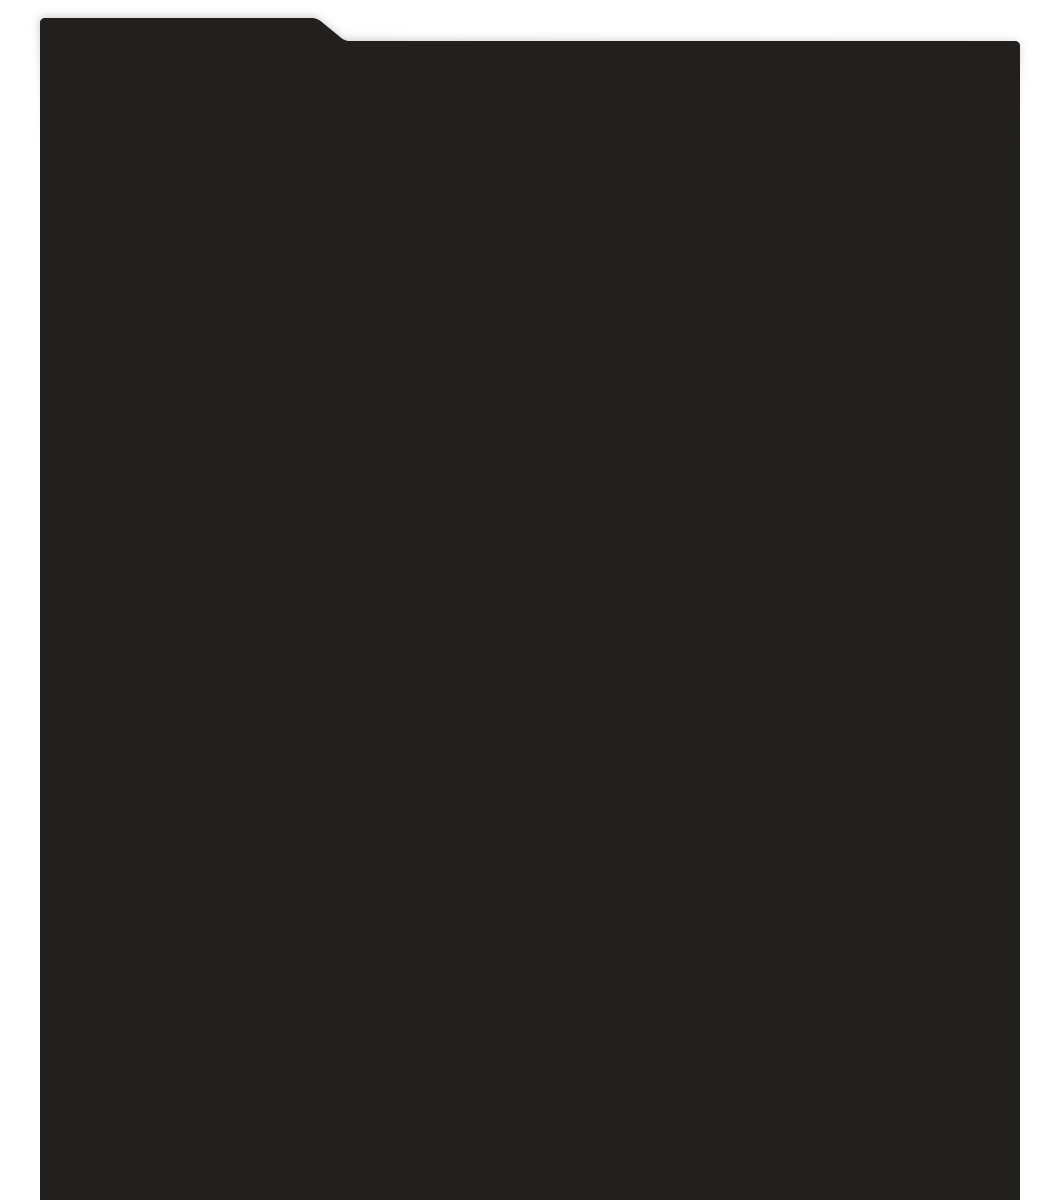
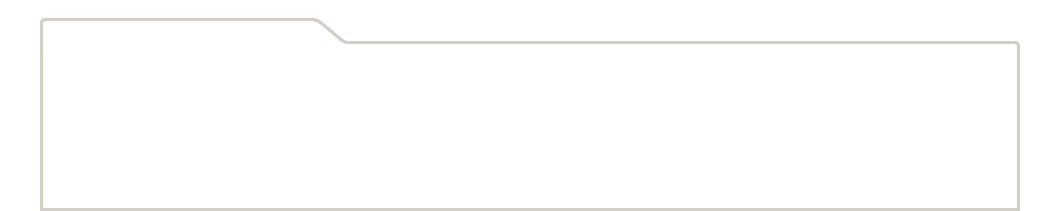
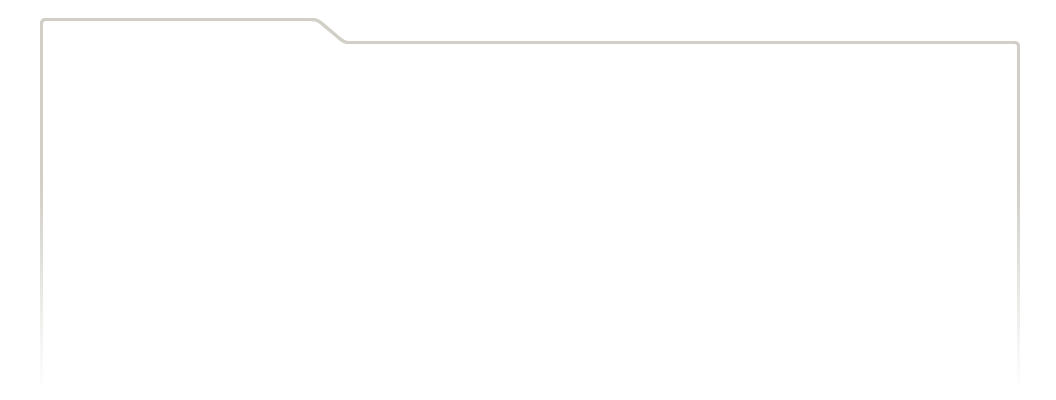
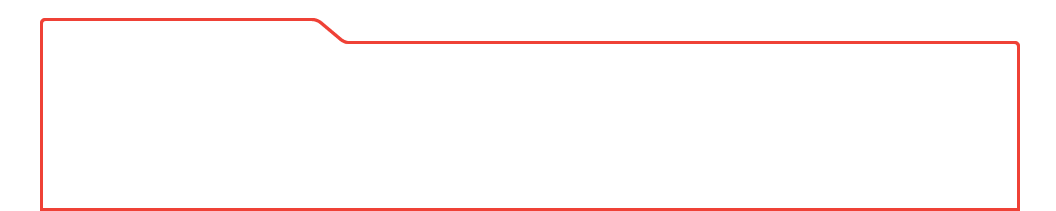
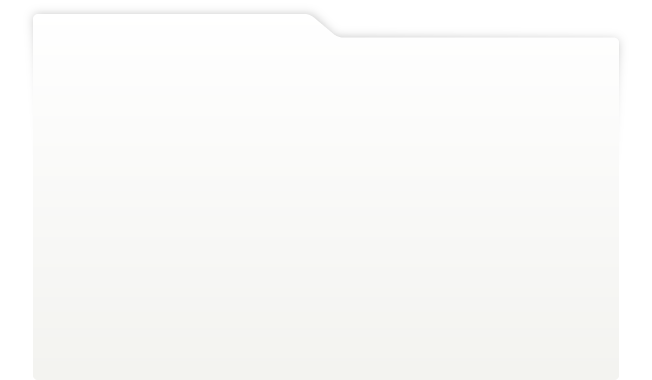
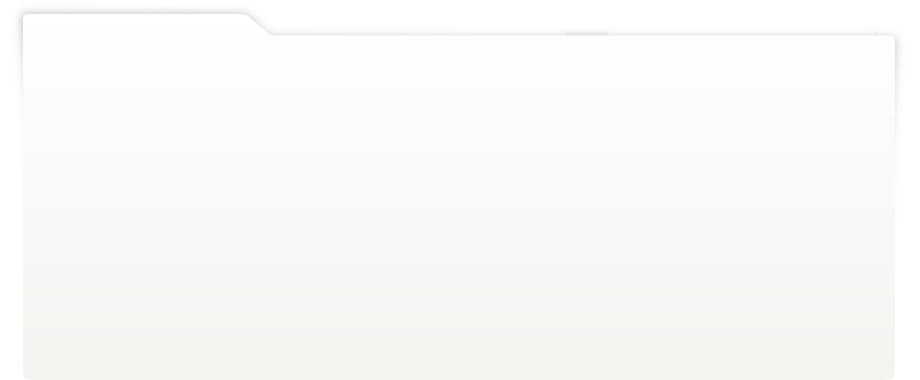
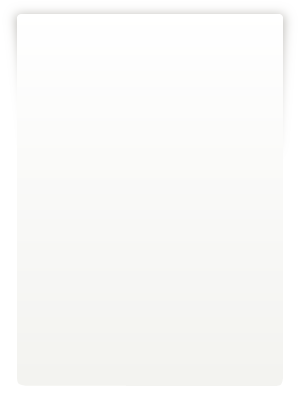
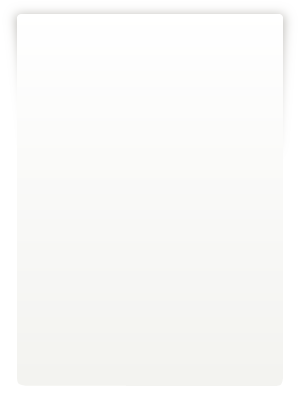
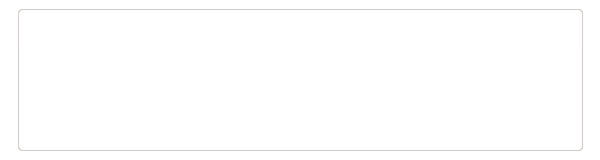
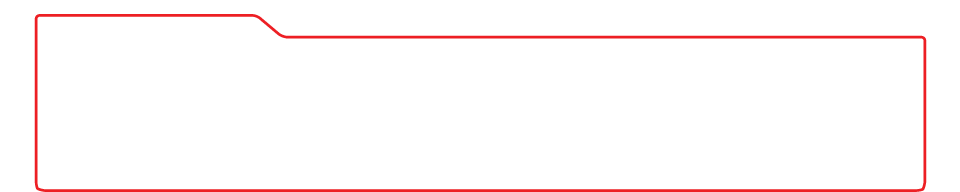
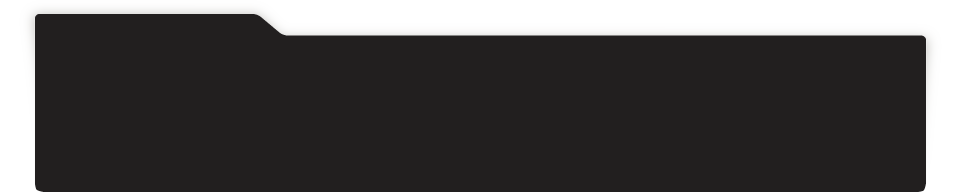
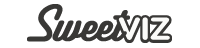
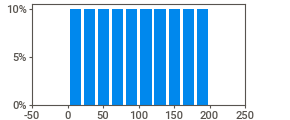
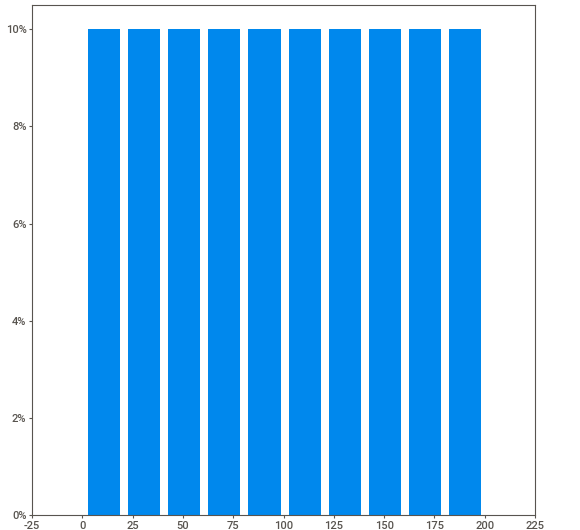
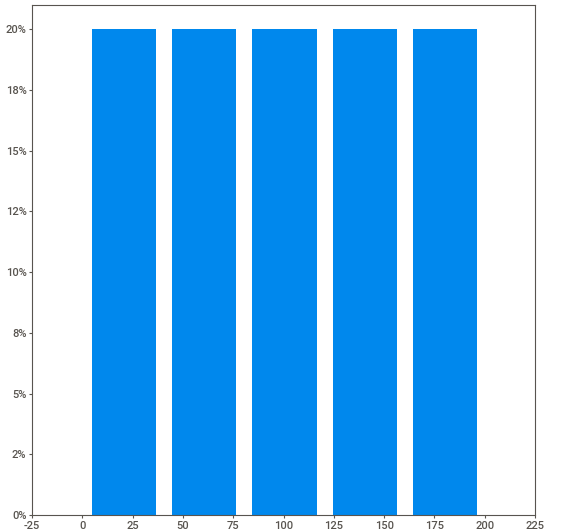
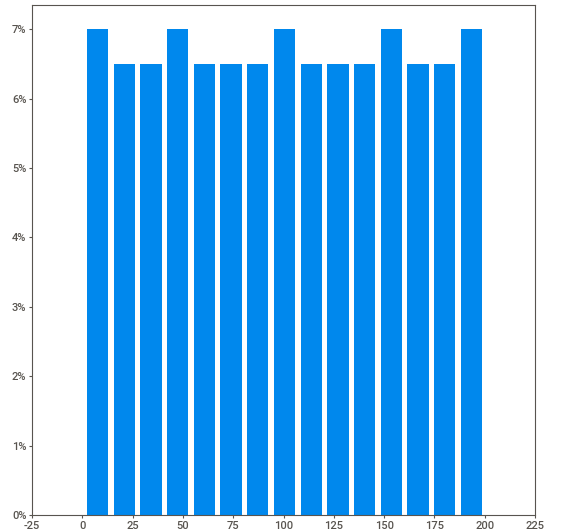
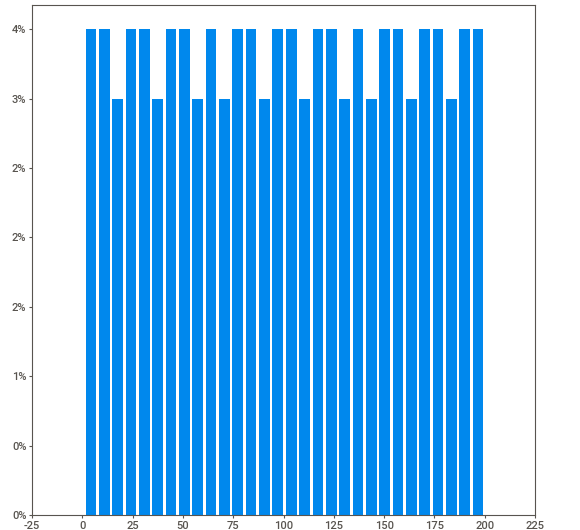
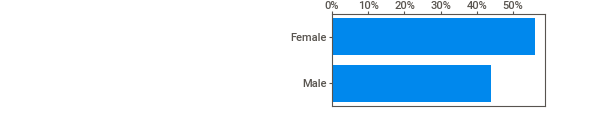
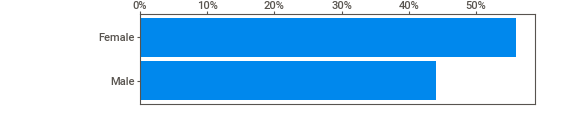
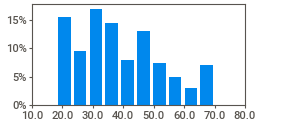
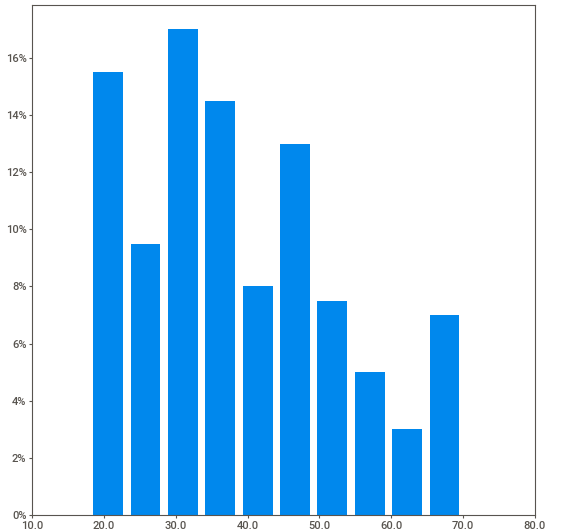
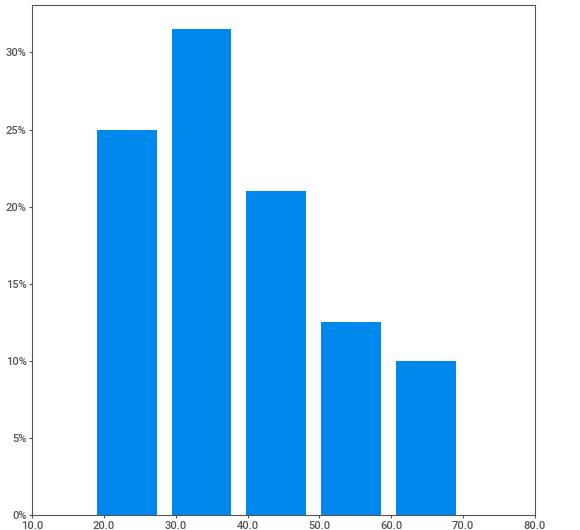
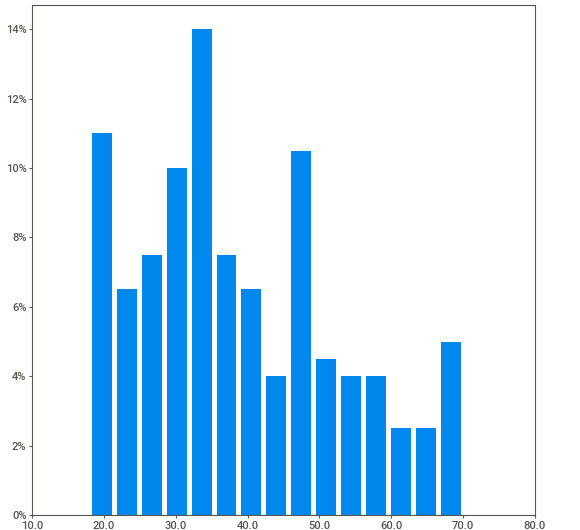
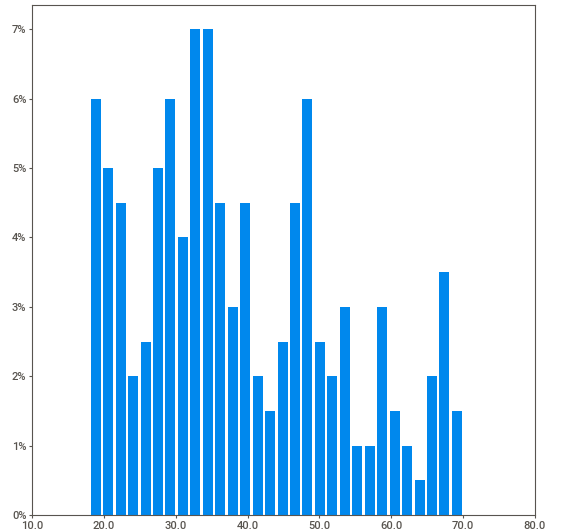
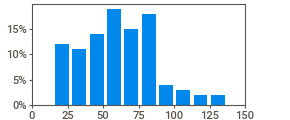
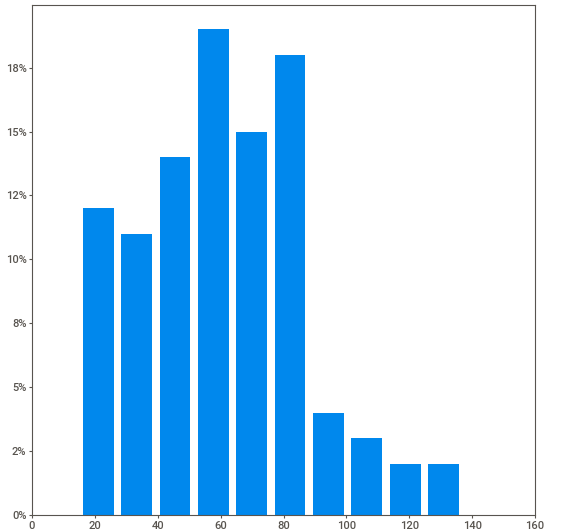
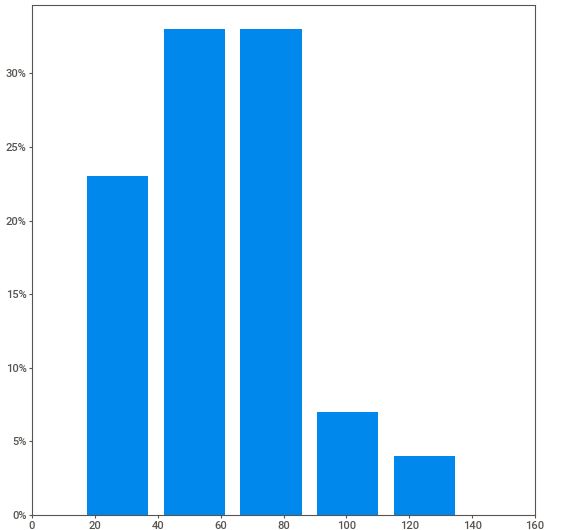
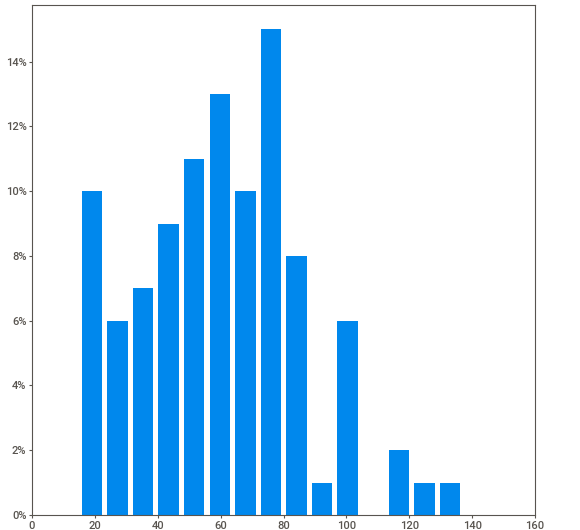
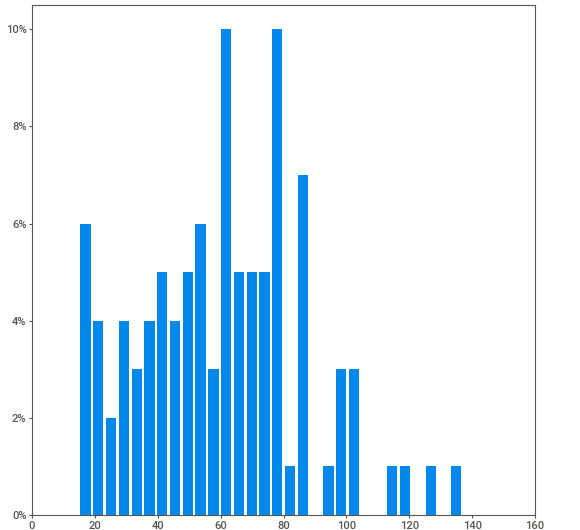
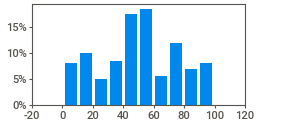
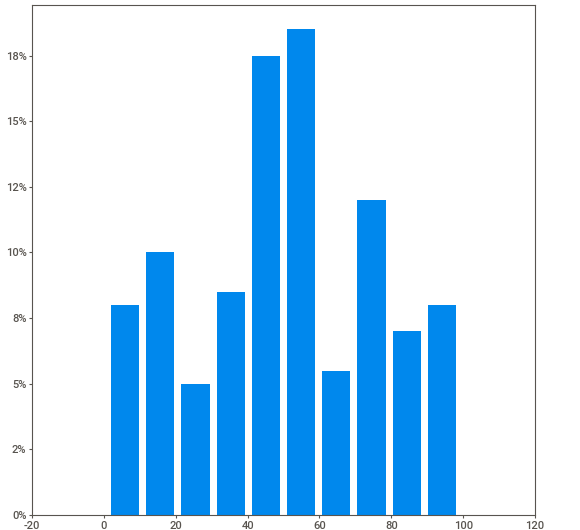
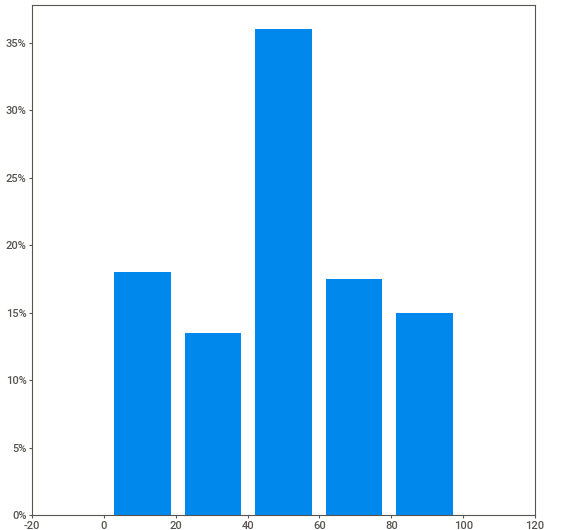
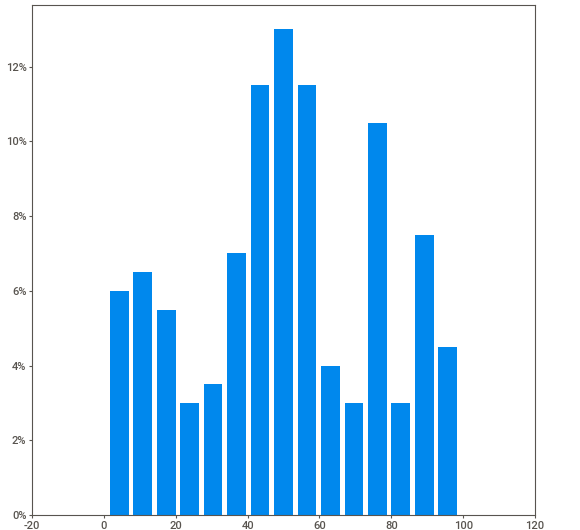
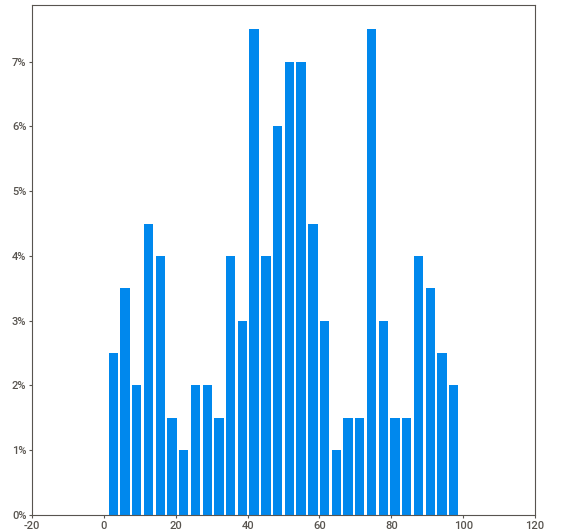
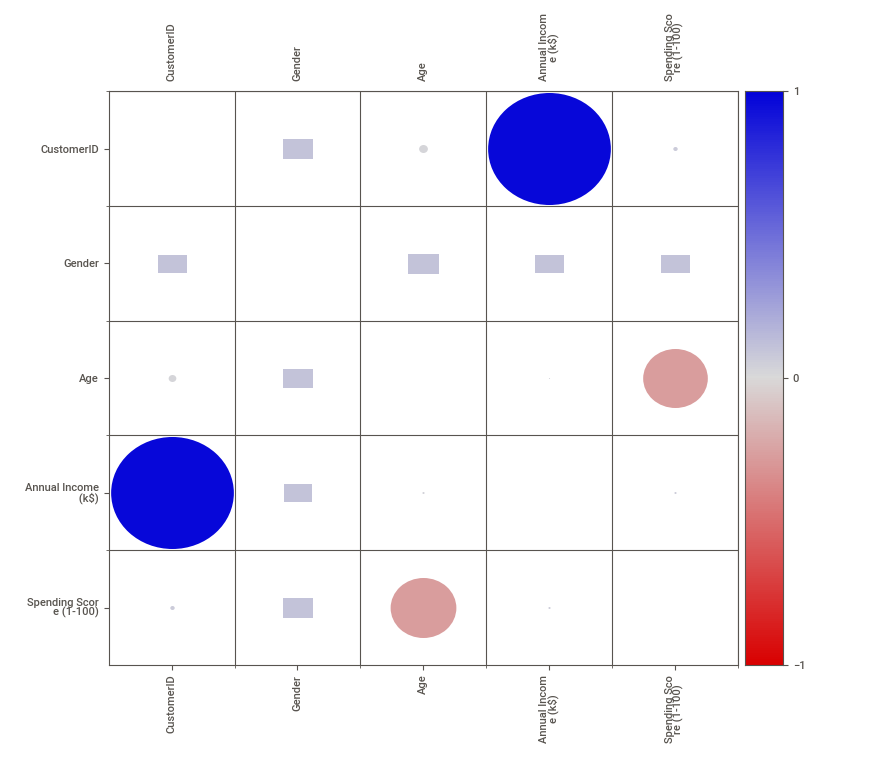
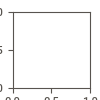

In [158]:
report.show_notebook()# It provides a good all in one analytical result with a small amount of code 

In [159]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()
df['Gender']=le.fit_transform(df["Gender"])

In [160]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [161]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [162]:
df["Age Group"] =df["Age"].apply(group_age)

# To order plotly index
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

## Segmentation based on Annual Income and Spending Score

In [163]:
data =df[[ 'Spending Score (1-100)','Annual Income (k$)']]
d1=df[[ 'Spending Score (1-100)','Annual Income (k$)']].iloc[: , :].values
df_log = np.log(data)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [164]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [165]:
errors = []
for k in range(1, 11):
    model = (KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    model.fit(d1)
    errors.append(model.inertia_)

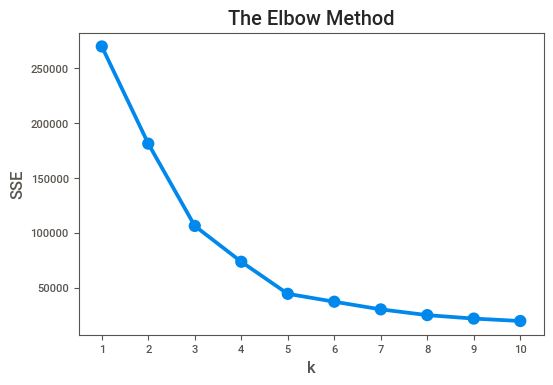

In [166]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

The optimum number of classes is 5

In [167]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 5


In [169]:
model = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
model.fit(d1)
labels1 = model.labels_
centroids1 = model.cluster_centers_

In [170]:
data = data.assign(ClusterLabel= model.labels_)

In [171]:
data.groupby("ClusterLabel")[["Annual Income (k$)","Spending Score (1-100)"]].median()

,Annual Income (k$),Spending Score (1-100)
ClusterLabel,,
0,24.5,77.0
1,54.0,50.0
2,79.0,83.0
3,85.0,16.0
4,25.0,17.0


In [172]:
import plotly.express as px

In [173]:
fig = px.scatter(
    data_frame=data,
    x = "Annual Income (k$)",
    y= "Spending Score (1-100)",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

In [174]:
h = 0.02
x_min, x_max = d1[:, 0].min() - 1, d1[:, 0].max() + 1
y_min, y_max = d1[:, 1].min() - 1, d1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 

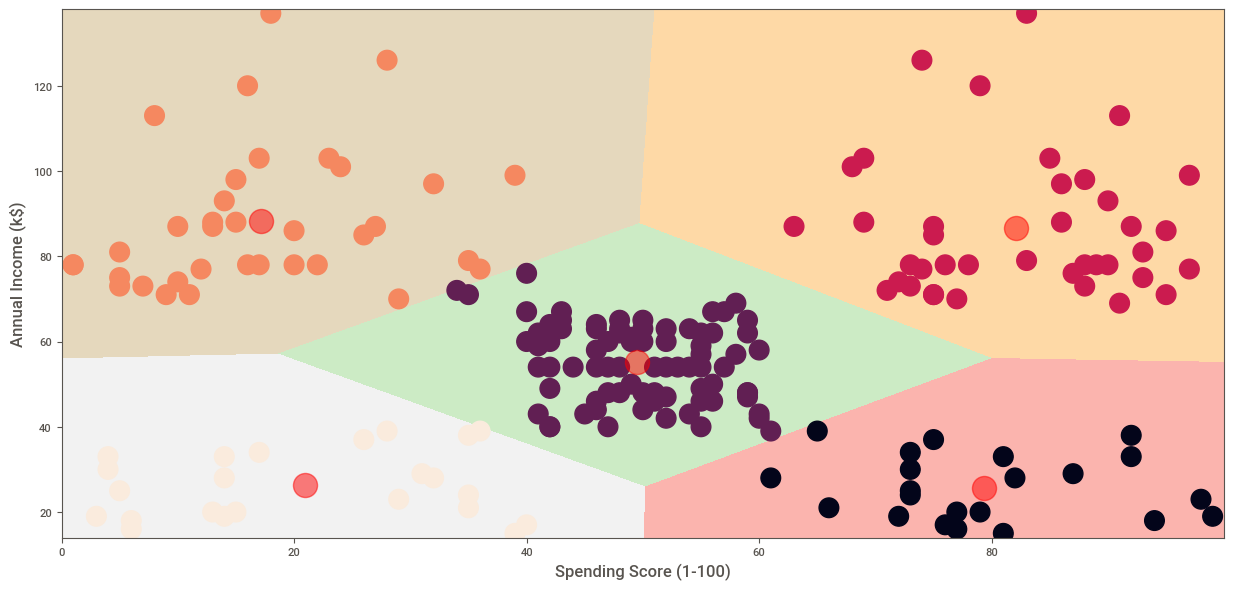

In [175]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, aspect = 'auto', origin='lower')

plt.scatter( x ='Spending Score (1-100)',y='Annual Income (k$)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Spending Score (1-100)')
plt.show()

## Segmentation using Age and Spending Score

In [176]:
from sklearn.cluster import KMeans
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )# the default elkan algorithm is used 
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

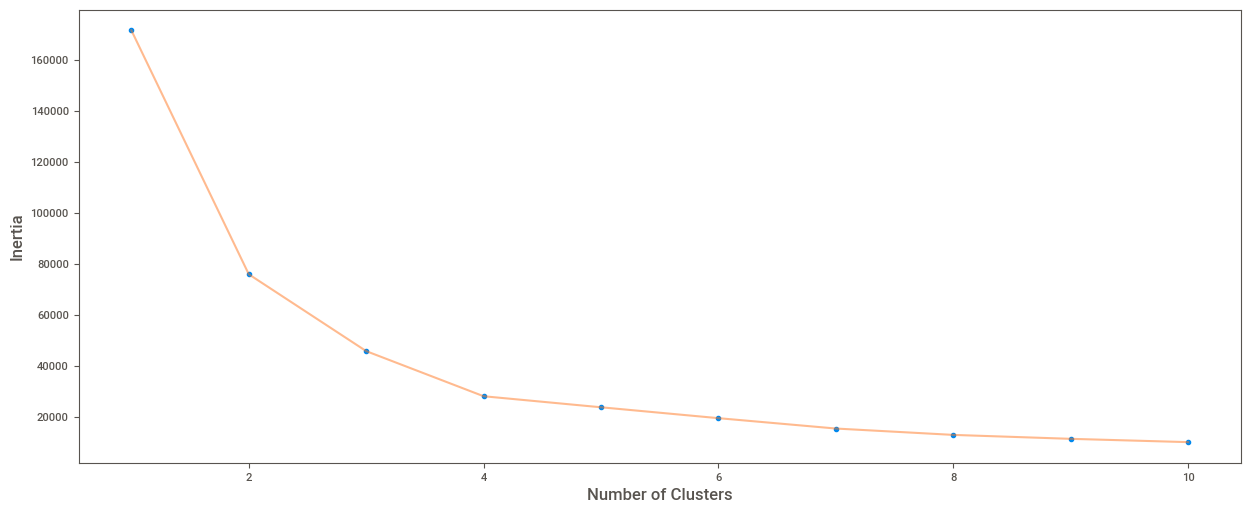

In [177]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

4 is the optimum number of clusters

In [178]:
# From the number of clusters obatined from the above graph we will apply the KMeans algorithm
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )#using the default elkan algorithm 
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [179]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

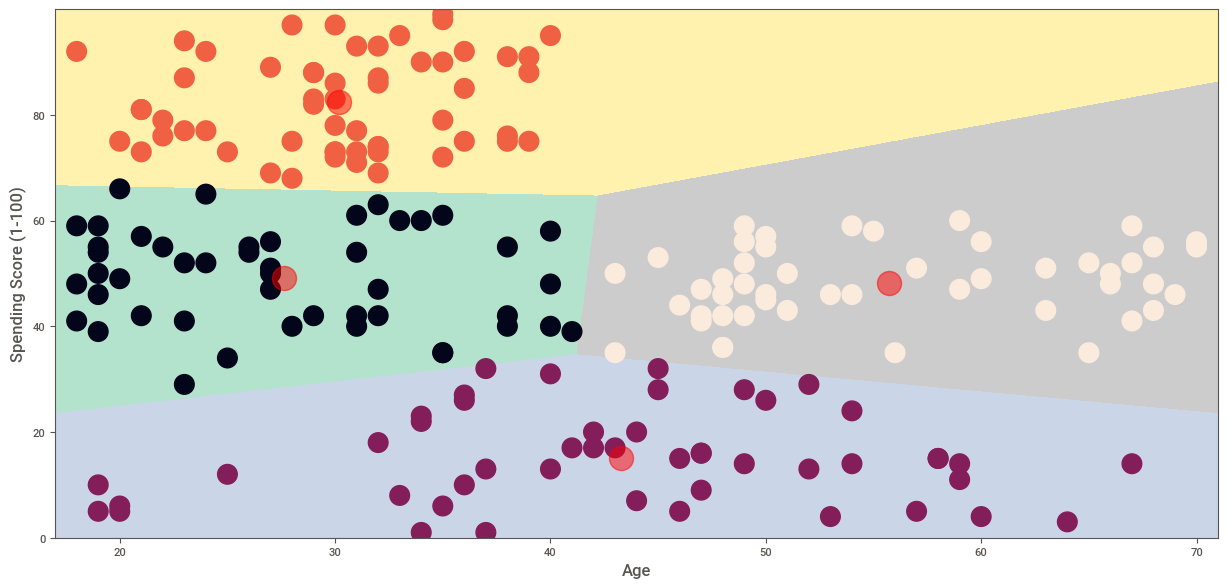

In [180]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## Segmentation using Anual Income, Spending Score and Age

In [181]:
data = df[["Annual Income (k$)","Spending Score (1-100)","Age"]]
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [182]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

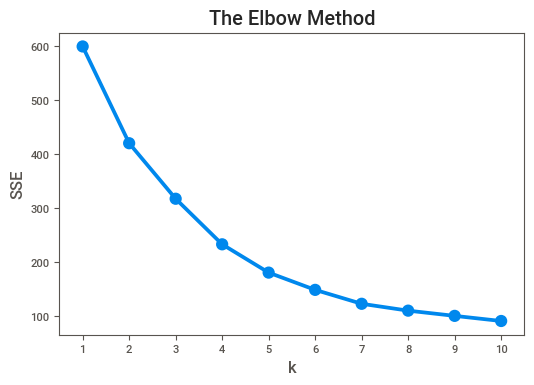

In [183]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

In [184]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 4


In [185]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

In [186]:
data = data.assign(ClusterLabel= model.labels_)

In [187]:
data.groupby("ClusterLabel")[["Annual Income (k$)","Spending Score (1-100)","Age"]].median()

,Annual Income (k$),Spending Score (1-100),Age
ClusterLabel,,,
0,78.0,10.5,43.5
1,54.0,46.0,51.0
2,75.5,70.0,31.5
3,28.0,69.0,24.5


In [188]:
fig = px.scatter_3d(data_frame=data, x="Annual Income (k$)", 
                    y="Spending Score (1-100)", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()